In [1]:
import pandas as pd
import numpy as np
import pickle
from os import path
import re
import nltk
import gensim
import time
import matplotlib.pyplot as plt

In [2]:
with open(path.expanduser('~/work/data/talk_meta.pkl'), "rb") as input_file:
    talk_meta = pickle.load(input_file)
    
with open(path.expanduser('~/work/data/talk_sub.pkl'), "rb") as input_file:
    talk_sub = pickle.load(input_file)
    
with open(path.expanduser('~/work/data/talk_pre.pkl'), "rb") as input_file:
    talk_pre = pickle.load(input_file)

In [8]:
len(talk_pre)

72299

In [3]:
data_words = talk_pre['transcript'].apply(lambda x: x.split()).values

id2word = gensim.corpora.Dictionary(data_words)

corpus = [id2word.doc2bow(text) for text in data_words]

In [4]:
token_tf = [(id2word[token_id],freq) for token_id, freq in id2word.cfs.items()]
token_tf.sort(key=lambda x: x[1], reverse = True)
_, tf = zip(*token_tf)

In [5]:
token_df = [(id2word[token_id],freq) for token_id, freq in id2word.dfs.items()]
token_df.sort(key=lambda x: x[1], reverse = True)
_, df = zip(*token_df)

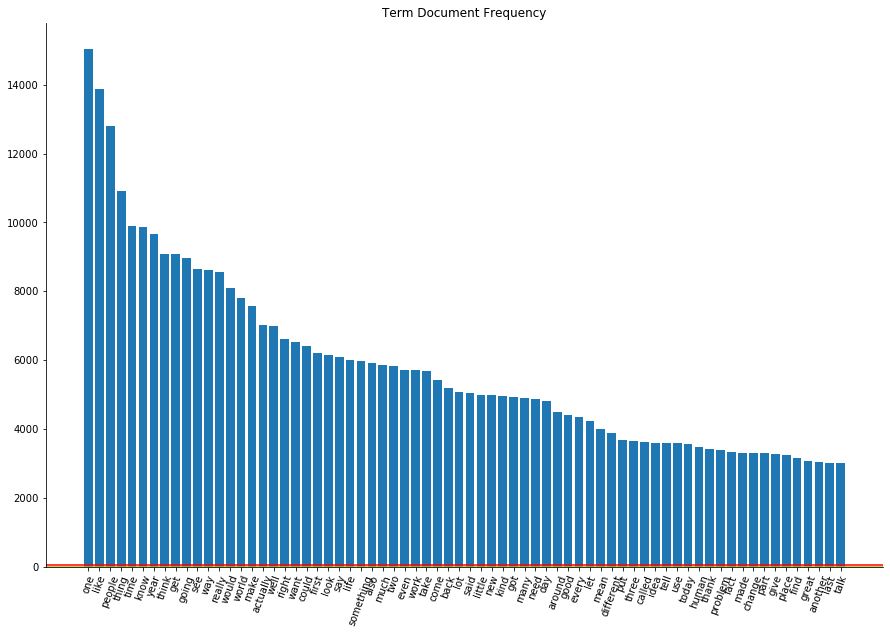

In [6]:
fig, ax = plt.subplots(figsize = (15,10))

plt.bar(*zip(*token_df[:70]))
plt.axhline(y=np.percentile(df,90), color='r', linestyle='-')
plt.axhline(y=np.percentile(df,50), color='y', linestyle='-')


ax.set_title("Term Document Frequency")
ax.tick_params(axis='x', rotation=70)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

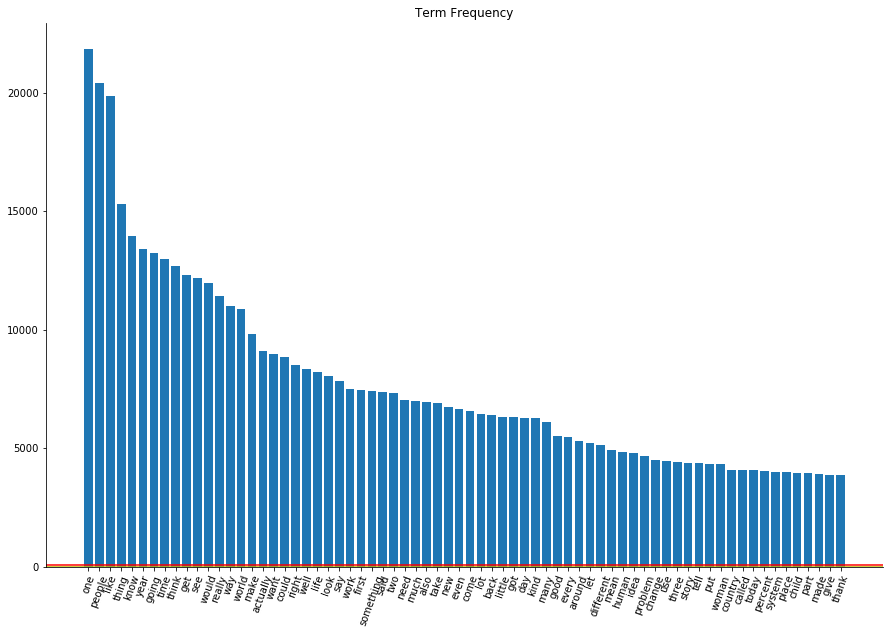

In [7]:
fig, ax = plt.subplots(figsize = (15,10))

plt.bar(*zip(*token_tf[:70]))
plt.axhline(y=np.percentile(tf,90), color='r', linestyle='-')
plt.axhline(y=np.percentile(tf,50), color='y', linestyle='-')

ax.set_title("Term Frequency")
ax.tick_params(axis='x', rotation=70)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()